*Group Members*: 

- Nabil Arrouss (qup85ses) 
- Ahmad Pamir Sahak (las06weq) 
- Kohei Fujimura (koj66veq) 
- Heydar Bagloo ( yeq42hip)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.stats import gaussian_kde

from tqdm import tqdm #optional, if you do not want to import remove tqdm() from loops!
import pandas as pd


# 1. Preprocessing

We again will be using the MNIST dataset. This time I prepared the dataset as a npy file. We will load the data visualize an example and the implement logistic regression.

In [2]:
df = pd.read_csv('dataset.csv')

X = df[['feature_1', 'feature_2']].values
y = df['class'].values

print(f"Total samples: {len(X)}")
print(f"Class 0: {np.sum(y == 0)} samples")
print(f"Class 1: {np.sum(y == 1)} samples")

Total samples: 1500
Class 0: 750 samples
Class 1: 750 samples


C:\Users\Pamir\AppData\Local\Temp\ipykernel_15584\1548744810.py:6: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  ax.scatter(X_class0[:, 0], X_class0[:, 1], c='red', marker='o',
C:\Users\Pamir\AppData\Local\Temp\ipykernel_15584\1548744810.py:10: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  ax.scatter(X_class1[:, 0], X_class1[:, 1], c='green', marker='^',


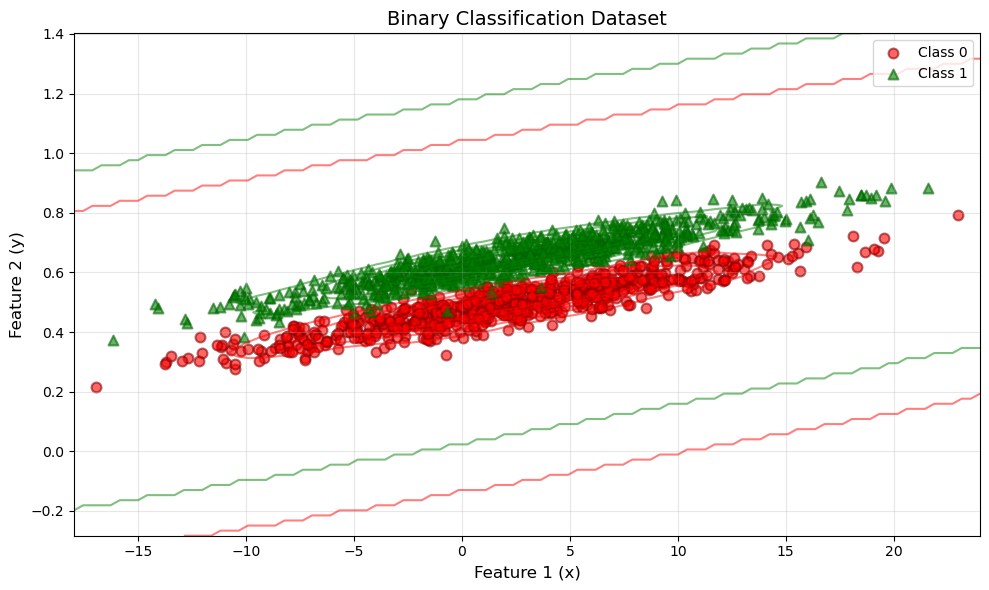

In [3]:

fig, ax = plt.subplots(figsize=(10, 6))

X_class0 = X[y == 0]
X_class1 = X[y == 1]

ax.scatter(X_class0[:, 0], X_class0[:, 1], c='red', marker='o', 
           s=50, alpha=0.6, edgecolors='darkred', linewidth=1.5, 
           facecolors='none', label='Class 0')

ax.scatter(X_class1[:, 0], X_class1[:, 1], c='green', marker='^', 
           s=50, alpha=0.6, edgecolors='darkgreen', linewidth=1.5, 
           facecolors='none', label='Class 1')

kde0 = gaussian_kde(X_class0.T)
x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx0, yy0 = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
positions0 = np.vstack([xx0.ravel(), yy0.ravel()])
z0 = kde0(positions0).reshape(xx0.shape)
ax.contour(xx0, yy0, z0, colors='red', alpha=0.5, linewidths=1.5)

kde1 = gaussian_kde(X_class1.T)
xx1, yy1 = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
positions1 = np.vstack([xx1.ravel(), yy1.ravel()])
z1 = kde1(positions1).reshape(xx1.shape)
ax.contour(xx1, yy1, z1, colors='green', alpha=0.5, linewidths=1.5)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xlabel('Feature 1 (x)', fontsize=12)
ax.set_ylabel('Feature 2 (y)', fontsize=12)
ax.set_title('Binary Classification Dataset', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [4]:
np.random.seed(42)
indices = np.random.permutation(len(X))

# Split: 80% train, 20% test
train_size = int(0.8 * len(X))

train_idx = indices[:train_size]
test_idx = indices[train_size:]

x_train, y_train = X[train_idx], y[train_idx]
x_test, y_test = X[test_idx], y[test_idx]

print(f"Training set: {x_train.shape[0]} samples")
print(f"Test set: {x_test.shape[0]} samples")

Training set: 1200 samples
Test set: 300 samples


# 2. Logistic Regression

From the lecture we know that logistic regression is given by affined transformation of the data followed by applying the sigmoid function. Our first step is to implement the function we need.

In [5]:
def layer(x, w):
    """
    Parameters
    ----------
    x : feature tensor
    w : learnable parameters

    Returns
    -------
    res : output tensor

    res should be the result of the matrix multiplication of the feature tensor with 
    the learnable parameters.

    """
    
    # TODO
    # Implement the affine transformation
    x_ext = np.hstack([np.ones((x.shape[0], 1)), x])   # Add bias term
    res = x_ext @ w
    # END
    
    return res

In [6]:
def sigmoid(y):
    """
    

    Parameters
    ----------
    y : Prediction tensor

    Returns
    -------
    res : Sigmoid transformed tensor

    """
    # TODO 
    # Put your code here:
    # Start
    res = 1 / (1 + np.exp(-y))
    # END
    return res

In [7]:
def model(x, w):
    """
    
    Parameters
    ----------
    x : feature tensor
    w : learnable parameters

    Returns
    -------
    res : Prediction tensor

    """
    
    # TODO
    # Put your code here:
    # Start
    x_ext = np.hstack([np.ones((x.shape[0], 1)), x])   # Add bias term
    res = sigmoid(x_ext @ w)
    # END
    
    return res

### 2.2.3 Newton’s method
In this section implement Newton's method

In [8]:
def newtonMethod(x, y, w):
    """
    
    Parameters
    ----------
    x : feature tensor
    y : class vector 
    w : learnable parameters

    Returns
    -------
    w_update : updated learnable parameters

    """
    # TODO 
    # Implement one update iteration
    # Put your code here:
    # Start
     # Predicted probabilities

    eps = 1e-5
    # Extend X with bias column
    x_ext = np.hstack([np.ones((x.shape[0], 1)), x])
    p = sigmoid(x_ext @ w)
    grad = x_ext.T @ (p - y)
    S = np.diag(p * (1-p))
    H = x_ext.T @ S @ x_ext
    H_inv = np.linalg.inv(H + eps * np.eye(H.shape[0]))
    w_update = w - H_inv @ grad
    # END
    return w_update

# 3. Training with Newton's method
Now use the dataset to train a classifier and compare the results.

In [9]:
#TODO: Implement training for newton's method. Also evaluate youre model after each epoch on the test data and save the accuracy.
# Start with random initialization of learnable parameters
# Put your code here:
# Start
epochs = 15
w = np.random.randn(3) * 0.01

train_acc = []
test_acc = []

for _ in tqdm(range(epochs)):
    w = newtonMethod(x_train, y_train, w)

    train_pred = (model(x_train, w) > 0.5).astype(int)
    test_pred = (model(x_test, w) > 0.5).astype(int)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))
# END

100%|██████████| 15/15 [00:00<00:00, 79.87it/s]


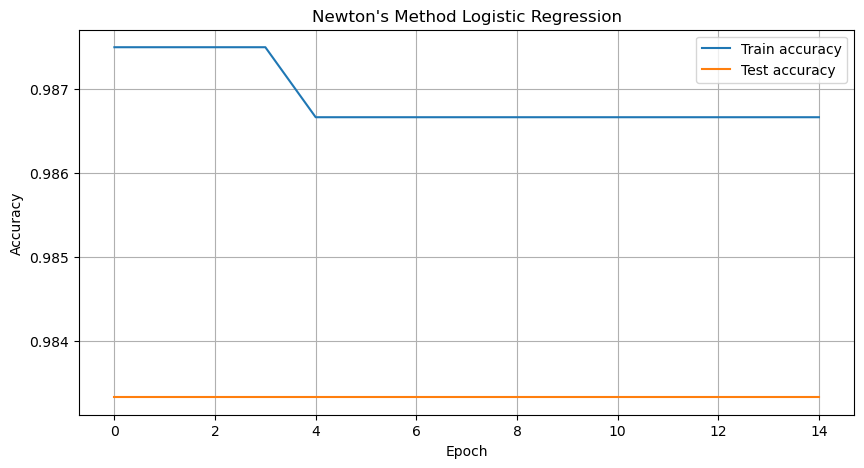

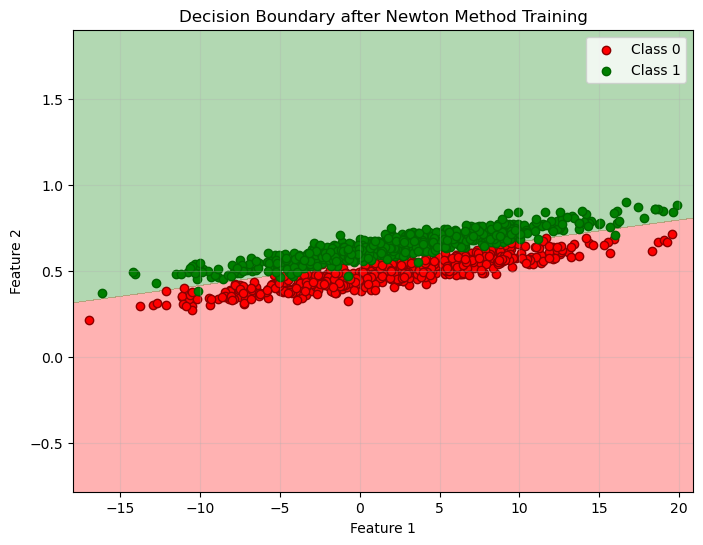

In [11]:
#TODO: Plot the training and validation accuracy curves after each epoch
# Put your code here:
# Start
# plot accurecies
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label="Train accuracy")
plt.plot(test_acc, label="Test accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Newton's Method Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# plot decision boundry
xx, yy = np.meshgrid(
    np.linspace(x_train[:, 0].min() - 1, x_train[:, 0].max() + 1, 300),
    np.linspace(x_train[:, 1].min() - 1, x_train[:, 1].max() + 1, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]
Z = model(grid, w).reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=['red', 'green'])
plt.scatter(x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1],
            c='red', edgecolors='darkred', label='Class 0')
plt.scatter(x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1],
            c='green', edgecolors='darkgreen', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary after Newton Method Training')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# END